In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import cm

In [2]:
#サイズと初期質量（軽石ほ）
def m0(x, a=0.0610, b=-1.95):
    val = a*x**1.5+b
    return val

In [3]:
def diameter(x, sigma0=0.853):
    V = m0(x)/sigma0
    r = ((0.75/np.pi)*V)**(1/3)
    return r

In [4]:
#吸水量（流体条件）
def A(t, x, k1=0.0271, k2=-0.498, k3=0.0156, k4=1.11):
    if t == 0:
        return 0
    else:
        val = (k1*x+k2)*np.log10(t)+(k3*x+k4)
        return val

In [5]:
#密度変化
def sigma(t, x, sigma0=0.853):
    m_ = 1 + A(t, x)/m0(x)
    sigma = sigma0 * m_
    return sigma

In [6]:
def tan_theta_e(sigma_val, c = 0.6, rho = 1.33, phi_c = 37):
    val = ((sigma_val/rho-1)*c)/((sigma_val/rho-1)*c+1)*math.tan(math.radians(phi_c))
    return val

In [7]:
def theta_e(sigma_val):
    val = math.degrees(math.atan(tan_theta_e(sigma_val)))
    return val

In [8]:
#各種計算
t = [i for i in np.arange(0.01, 100, 20)]
x = [i for i in np.arange(30, 65)]
     
sigma_c = 1.2
l_sigma_c = np.array([sigma_c for j in x])
l_sigma = np.array([[sigma(i, j) for j in x] for i in t])

l_sigma_c_theta_e = [theta_e(sigma_c) for i in x]
l_sigma_theta_e = np.zeros_like(l_sigma)
for di, i in enumerate(t):
    for dj, j in enumerate(x):
        l_sigma_theta_e[di, dj] = theta_e(l_sigma[di, dj])

Text(0, 0.5, 'σ [g/$cm^3$]')

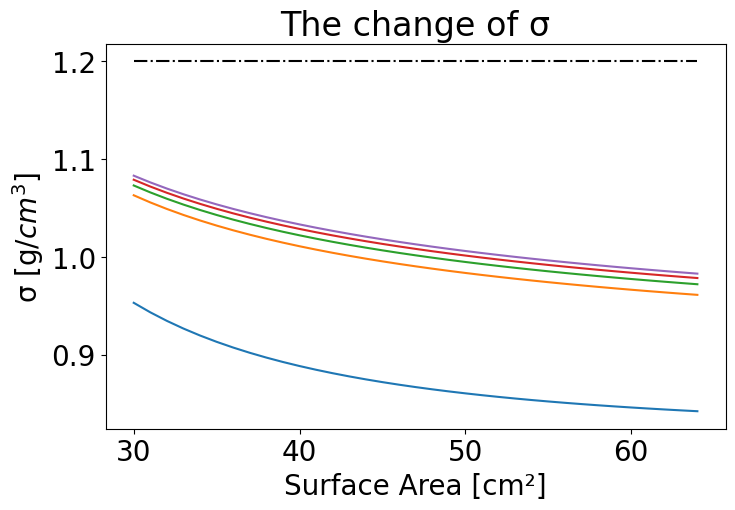

In [9]:
fig = plt.figure(figsize=(8,5))
plt.rcParams["font.size"] = 20

plt.plot(x, l_sigma_c, c = 'black', linestyle = 'dashdot', label = 'Previous Research')
plt.plot(x, l_sigma.T, label = 'Pumice')

plt.title('The change of σ')
plt.xlabel('Surface Area [cm²]')
plt.ylabel('σ [g/$cm^3$]')

#plt.legend()

Text(0, 0.5, '$θ_e$ [°]')

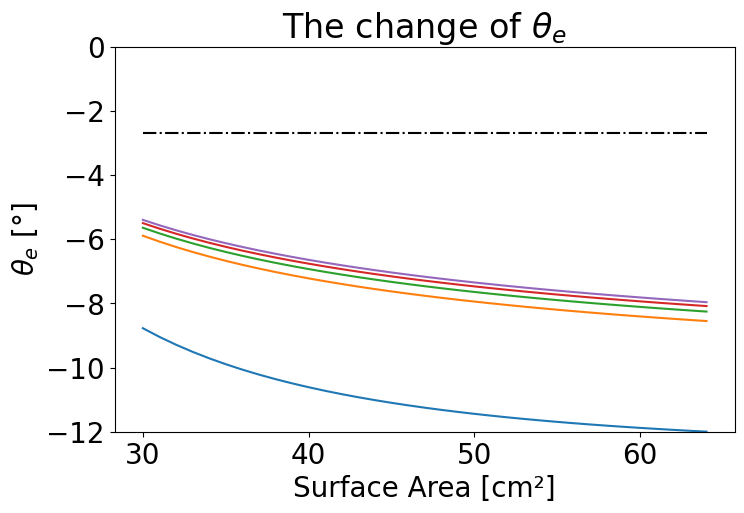

In [10]:
fig = plt.figure(figsize=(8,5))
cmap = cm.viridis
colors = cmap(np.linspace(0, 1, len(x)))  # x のデータ数に応じてカラーマップから色を取得

plt.plot(x, l_sigma_c_theta_e, c = 'black', linestyle = 'dashdot')
plt.plot(x, l_sigma_theta_e.T)

plt.ylim(-12, 0)

plt.title('The change of $θ_e$')
plt.xlabel('Surface Area [cm²]')
plt.ylabel('$θ_e$ [°]')